In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
house_price = pd.read_csv("Data/housing_iter_0-2/housing-classification-iter-0-2.csv")
house_price

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


In [3]:
y = house_price.pop("Expensive")

In [4]:
X = house_price.copy()

In [5]:
# split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [7]:
# initialize transformers and model
# create a pipeline to be used for the grid search 
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()
pipeline = make_pipeline(imputer, dtree)

In [8]:
# create a set of parameters for the grid search
param_grid = {"simpleimputer__strategy": ["mean", "median"],
              "decisiontreeclassifier__max_depth": range(1, 10),
              "decisiontreeclassifier__min_samples_leaf": range(5, 31, 5),
              "decisiontreeclassifier__min_samples_split": range(3, 41, 5),
              "decisiontreeclassifier__criterion": ["gini", "entropy"]
             }

In [9]:
search = GridSearchCV(pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv = 5, # the value for K in K-fold Cross Validation
                      scoring = "accuracy", # the performance metric to use, 
                      verbose = 1) # we want informative outputs during the training process

In [10]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(1, 10),
                         'decisiontreeclassifier__min_samples_leaf': range(5, 31, 5),
                         'decisiontreeclassifier__min_samples_split': range(3, 41, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             scoring='accuracy', verbose=1)

In [11]:
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 3,
 'simpleimputer__strategy': 'median'}

In [12]:
search.best_score_

0.9220864971937933

In [13]:
# create a pipeline from the optimal parameters from the grid search
op_imputer = SimpleImputer(strategy = "median")
op_dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 5, 
                                    min_samples_split = 3)
op_pipeline = make_pipeline(op_imputer, op_dtree)

In [14]:
op_pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=3))])

In [15]:
y_train_pred = op_pipeline.predict(X_train)

In [16]:
accuracy_score(y_true = y_train, y_pred = y_train_pred)

0.9357876712328768

In [17]:
y_test_pred = op_pipeline.predict(X_test)

In [18]:
accuracy_score(y_true = y_test, y_pred = y_test_pred)

0.9383561643835616

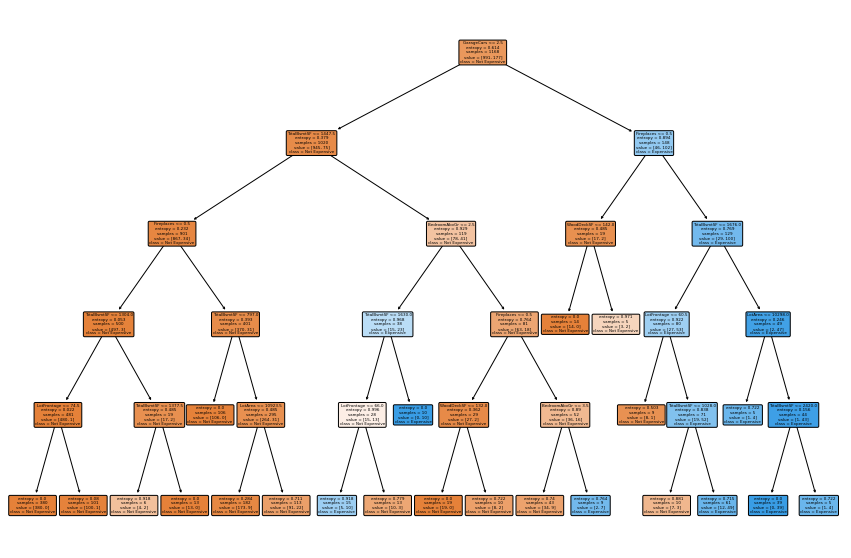

In [19]:
plt.figure(figsize = (15, 10))
plot_tree(op_dtree, filled = True, rounded = True, class_names = ["Not Expensive", "Expensive"], 
          feature_names = X.columns);

In [22]:
# second iteration of the pipeline with a scaler
imputer = SimpleImputer()
scaler = StandardScaler()
dtree = DecisionTreeClassifier()

# create the pipeline
pipeline2 = make_pipeline(imputer, scaler, dtree)

# create parameter grid
param_grid2 = {"simpleimputer__strategy":["mean", "median"],
               "standardscaler__with_mean":[True, False],
               "standardscaler__with_std":[True, False],
               "decisiontreeclassifier__max_depth": range(1, 10),
               "decisiontreeclassifier__min_samples_leaf": range(5, 31, 5),
               "decisiontreeclassifier__min_samples_split": range(3, 41, 5),
               "decisiontreeclassifier__criterion":["gini", "entropy"]
              }

# define cross validation
search2 = GridSearchCV(pipeline2, param_grid2, cv = 5, verbose = 1)

In [23]:
search2.fit(X_train, y_train)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(1, 10),
                         'decisiontreeclassifier__min_samples_leaf': range(5, 31, 5),
                         'decisiontreeclassifier__min_samples_split': range(3, 41, 5),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [24]:
search2.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 3,
 'simpleimputer__strategy': 'median',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [25]:
search2.best_score_

0.923795898903195

In [27]:
op_imputer2 = SimpleImputer(strategy = "median")
op_scaler2 = StandardScaler()
op_dtree2 = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 5, 
                                    min_samples_split = 3)
op_pipeline2 = make_pipeline(op_imputer2, op_scaler2, op_dtree2)

In [28]:
op_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=3))])

In [29]:
y_train_pred2 = op_pipeline2.predict(X_train)
accuracy_score(y_true = y_train, y_pred = y_train_pred2)

0.9357876712328768

In [30]:
y_test_pred2 = op_pipeline2.predict(X_test)
accuracy_score(y_true = y_test, y_pred = y_test_pred2)

0.9383561643835616